In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt

from src.models.train import load_model
from src.data.make_dataset import load_and_clean_data


In [3]:
gb_model = load_model("../models/gb_churn_model.joblib")

df = load_and_clean_data("../data/raw/Telco-Customer-Churn.csv")

X = df.drop(columns=["Churn"])
y = df["Churn"]

In [4]:
preprocessor = gb_model.named_steps["preprocessor"]
model = gb_model.named_steps["model"]

In [5]:
feature_names = preprocessor.get_feature_names_out()

len(feature_names), feature_names[:10]

(17,
 array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
        'num__SeniorCitizen', 'cat__Contract_Month-to-month',
        'cat__Contract_One year', 'cat__Contract_Two year',
        'cat__PaymentMethod_Bank transfer (automatic)',
        'cat__PaymentMethod_Credit card (automatic)',
        'cat__PaymentMethod_Electronic check'], dtype=object))

In [6]:
importances = model.feature_importances_

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

importance_df.head(15)

,feature,importance
4,cat__Contract_Month-to-month,0.415584
0,num__tenure,0.203718
12,cat__InternetService_Fiber optic,0.153170
9,cat__PaymentMethod_Electronic check,0.055824
1,num__MonthlyCharges,0.048736
13,cat__InternetService_No,0.044914
2,num__TotalCharges,0.037511
16,bin__PaperlessBilling_Yes,0.015930
3,num__SeniorCitizen,0.008833
6,cat__Contract_Two year,0.006436


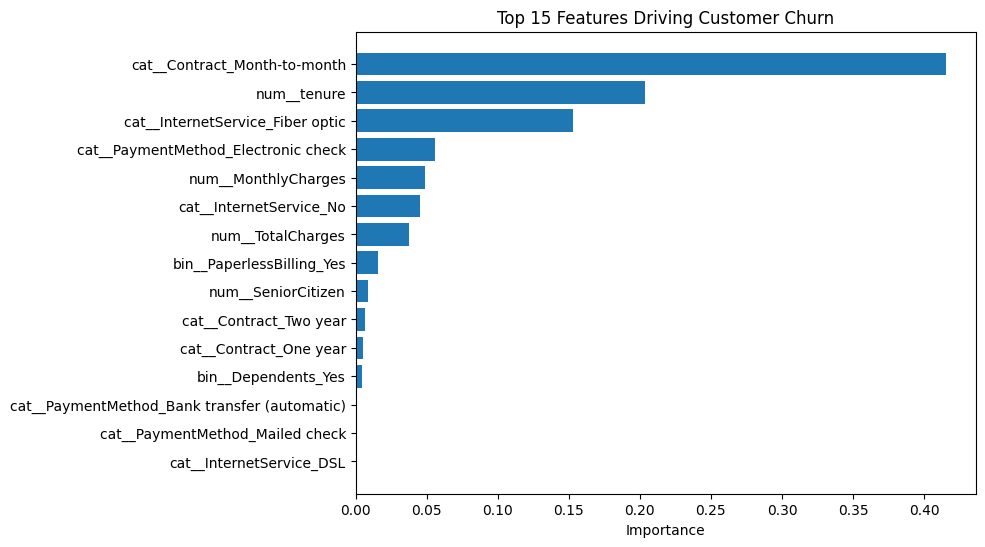

In [7]:
top_features = importance_df.head(15)

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Features Driving Customer Churn")
plt.xlabel("Importance")
plt.show()

In [ ]:
# Most important features are contract type, tenure and type of internet service.

In [ ]:
# Since churners are a minority class, accuracy alone is misleading.
# A model predicting “no churn” for all customers would still achieve ~73% accuracy.
# Therefore, recall for churners is prioritized.

In [ ]:
# Confusion Matrix Interpretation
# False negatives (missed churners) represent lost revenue opportunities
# False positives represent unnecessary retention offers
# The chosen threshold favors reducing false negatives, even at the cost of slightly more false positives

In [ ]:
# Missing a churner is more costly than offering retention to a loyal customer
# Therefore, recall is prioritized over precision
# Threshold tuning was used to increase recall while maintaining acceptable AUC

In [ ]:
# Gradient Boosting was selected because:
# It consistently achieved higher recall for churners
# It captured non-linear interactions between contract type, tenure, and charges
# ROC-AUC improvement indicates better ranking of high-risk customers

In [ ]:
# Key Drivers of Churn
# Month-to-month contracts show higher churn risk
# Short tenure customers are significantly more likely to churn
# Higher monthly charges correlate with churn probability

In [ ]:
# The model can be integrated into a customer management system to:
# Score customers daily
# Flag high-risk churners
# Trigger retention campaigns based on predicted risk